<a href="https://colab.research.google.com/github/Nayan2701/Servo-Prediction/blob/main/Servo_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Servo Prediction Using Linear Regression **

---


**A servomechanism, often called a servo for short, is basically an automatic control system for movement. Imagine a machine that needs to move very precisely, like a robot arm or the autofocus on a camera.**

# **Import Libraries**

---



In [ ]:
import pandas as pd
import numpy as np
import chardet

# **Import Dataset**

---



In [15]:
df=pd.read_csv(r'https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv')
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [17]:
df.describe(  )

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [18]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [19]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [20]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

In [21]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [22]:
  y=df['Class']
  y.shape

(167,)

In [23]:
x=df[['Motor','Screw','Pgain','Vgain']]
x.shape

(167, 4)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [25]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [26]:
model.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred=model.predict(x_test)

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [29]:
mean_squared_error(y_pred,y_test)

78.09268780983311

In [30]:
mean_absolute_error(y_pred,y_test)

7.634046571636291

In [31]:
r2_score(y_pred,y_test)

0.39689612453425505

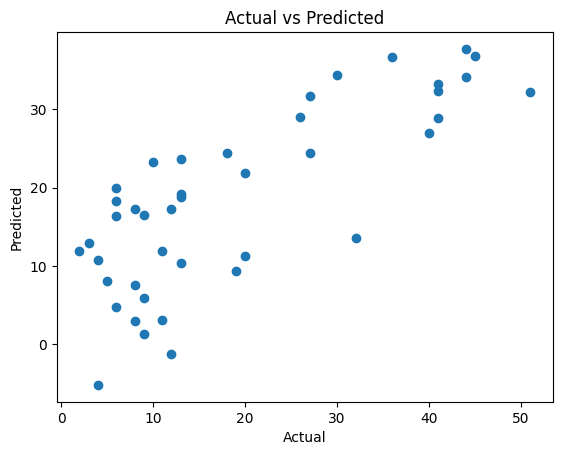

In [33]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

# **Get Future Prediction**

---

Lets select a random sample from current dataset
Steps to follow:

*   Extract a random row using sample function
*   Seperate x and y
*   Standarize x
*   Predict





In [35]:
x_new=df.sample(1)
x_new=x_new.drop('Class',axis=1)

In [39]:
y_pred_new=model.predict(x_new)
y_pred_new

array([16.24069901])